# MNIST Dataset

The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits 0 to 9. Each image is of size 28*28 pixels. The images are grayscale, i.e, there is only one channel for images. Images are divided into 10 different classes (digits 0 t0 9). 
It consist of-
- 60000 training images
- 10000 test images
- 28*28 pixels


![Sample image of MNIST dataset](https://upload.wikimedia.org/wikipedia/commons/thumb/2/27/MnistExamples.png/480px-MnistExamples.png "Sample image of MNIST dataset")

## Importing files

In [1]:
import numpy as np
# import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

## Loading Data

In [2]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

## Data Visualization

[]

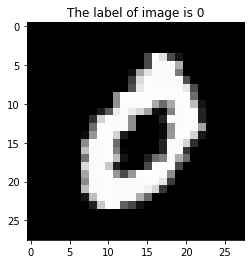

In [5]:
x=37
plt.title("The label of image is "+str(y_train[x]))
plt.imshow(X_train[x], cmap='gray')
plt.plot()

## Flattening and normalizing images
Now for Convolution layers we have to reshape our input into a single tenor. That's because the first convolution
expects a single tensor containing everything, so instead of 60,000 items (size = 28x28x1) in a list, we have a single
4D list that is 60,000x28x28x1.

In [6]:
input_shape = (28,28,1)
X_train = X_train.reshape(-1, input_shape[0], input_shape[1], input_shape[2]).astype('float32') / 255.0
X_test = X_test.reshape(-1, input_shape[0], input_shape[1], input_shape[2]).astype('float32') / 255.0

## CNN Model building

In [7]:
model = keras.Sequential([keras.Input(shape=input_shape), #(32,32,3)
                          keras.layers.Conv2D(32, (3,3), padding='valid', activation='relu'),
                          keras.layers.MaxPooling2D(pool_size=(2,2)),
                          keras.layers.Conv2D(64, (3,3), padding='valid', activation='relu'),
                          keras.layers.MaxPooling2D(pool_size=(2,2)),
                          keras.layers.Conv2D(128, (3,3), padding='valid', activation='relu'),
                          keras.layers.Flatten(),
                          keras.layers.Dense(64, activation='relu'),
                          keras.layers.Dense(10, activation='softmax')])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                7

## Compile

In [9]:
model.compile(loss=keras.losses.SparseCategoricalCrossentropy(),
                  optimizer=keras.optimizers.Adam(lr=0.001),
                  metrics=['accuracy'])

## Fit

In [10]:
model.fit(X_train, y_train, batch_size=32, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1329 - accuracy: 0.9583
Epoch 2/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0430 - accuracy: 0.9869
Epoch 3/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0304 - accuracy: 0.9903
Epoch 4/5
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0230 - accuracy: 0.9928
Epoch 5/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0174 - accuracy: 0.9945


## Evaluate

In [11]:
model.evaluate(X_test, y_test, batch_size=32)

313/313 [==============================] - 1s 4ms/step - loss: 0.0271 - accuracy: 0.9913


[0.02710089460015297, 0.9912999868392944]

So, we can see that here we got accuracy of **99.12**% on the test set.

## Test it on our data

In [19]:
import cv2
import glob

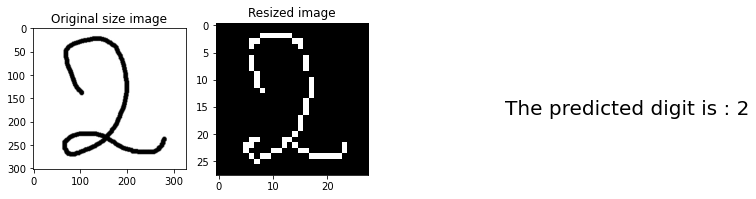

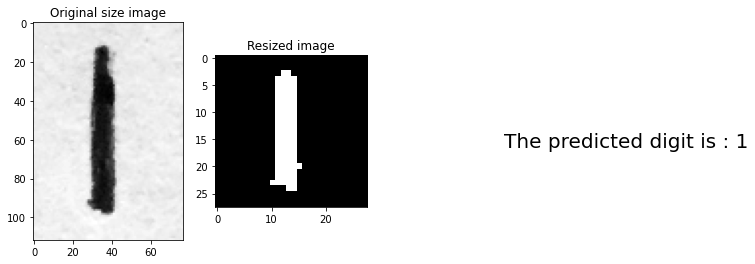

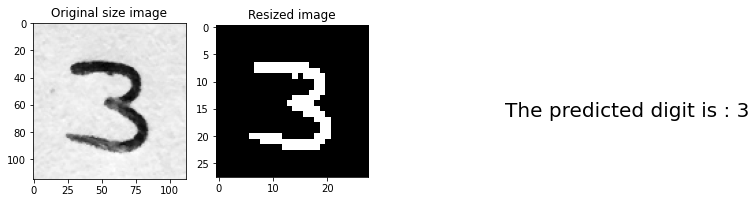

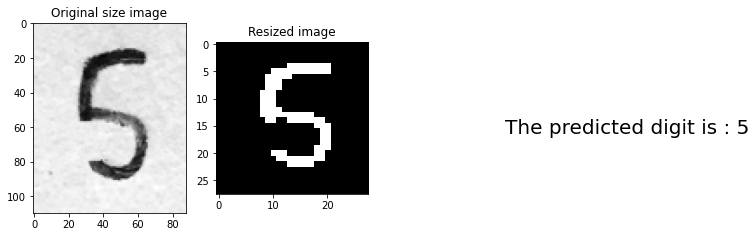

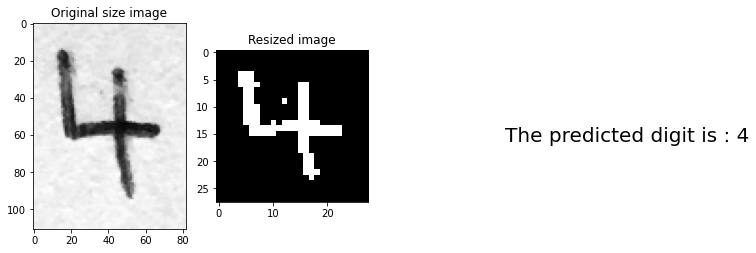

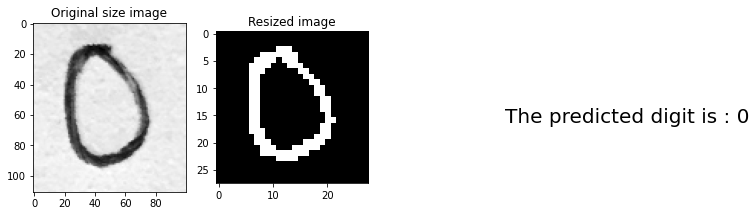

In [63]:
images = [cv2.imread(file, 0) for file in glob.glob("Handwritten_digits_Images\*.png")]
for image in images:
    plt.figure()#figsize=[18,3])
    img = cv2.resize(image, (28,28),)# interpolation=cv2.INTER_LINEAR)
    ret, binary = cv2.threshold(img, 170, 255, cv2.THRESH_BINARY_INV)
    plt.subplot(1, 2, 1), plt.imshow(image, 'gray'), plt.title("Original size image")
    plt.subplot(1, 2, 2), plt.imshow(binary, 'gray'), plt.title("Resized image")
    img = binary.reshape(-1, input_shape[0], input_shape[1], input_shape[2]).astype('float32') / 255.0
    result = list(model.predict(img).reshape(-1))
    plt.suptitle("The predicted digit is : " + str(result.index(max(result))), size=20, y=0.5, x=1.5)
#     print("The predicted digit is : ", result.index(max(result)))
plt.show()